#  <font color='blue'  >Hw4<font/> 
### Alejandro Moscoso 332336908
### Shiraz benyatov

In [71]:
import numpy as np
import pandas as pd
np.random.seed=50
from sklearn import decomposition

from time import time
import matplotlib.pyplot as plt
from  matplotlib.pyplot import figure
import pylab as pl
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets,neighbors,decomposition
from sklearn.decomposition import KernelPCA


from sklearn.metrics.pairwise import rbf_kernel


In [2]:


def pca(X_std,d):
#     print (np.cov(X_std.T))
#     mean_vec = np.mean(X_std, axis=0)
#     cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
    eig_vals, eig_vecs = np.linalg.eig(np.cov(X_std.T))  
    eig_pairs = sorted([x for x in zip(np.abs(eig_vals), eig_vecs)],key= lambda x :x[0], reverse=True)
#     print(eig_pairs)
    w =np.array([eig_pairs[i][1] for i in range(d)]).T
#     print(w)
    a =np.dot( X_std,w)
    return a




In [88]:
def kpca(data,dim,kernel, **kwards):
    
    #Get the dimentions and create a Zero matrix
    n, D = data.shape
    K= np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            #Run the kernel to all the mesurements 
            K[i,j]=kernel(X[i,:],X[j,:],**kwards) 
    j = np.identity(n)-np.ones([n,n])*1/n

    K_centred = np.dot(np.dot(j,K), j) #J*K*J
    eig_vals, eig_vecs = np.linalg.eig(K_centred)  
    eig_pairs = sorted([x for x in zip(np.abs(eig_vals), eig_vecs)],key= lambda x :x[0], reverse=True)
    w =np.array([eig_pairs[i][1] for i in range(dim)]).T
    a =np.dot(K,w)
    return a

def gausian( x, y , sigma): 
    dem = 2*(sigma)**2
    norm = np.linalg.norm(x-y)
    return np.exp(-norm/dem)


In [ ]:
plots[f'X_kpca gaus homeMade with sigma: {1}' ] = 

(1000, 3)

In [93]:
# gausian = lambda x, y, sigma : np.exp(-(np.linalg.norm(x-y))/(2*sigma**2))


n_points = 1000
X, color = datasets.make_s_curve(n_points, random_state=0)
plots={}
plots["X PCA"] = decomposition.PCA(n_components=2).fit_transform(X)
plots["X Our Pca"] = pca(X,2)
for gamma in [ 10, 5,1,0.1]:
    plots[f'X_kpca_gamma_{gamma}'] = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=gamma).fit_transform(X)
    
    plots[f'X_kpca_sigma_{np.sqrt(1/(2* gamma))}'] = kpca(X,2,gausian, sigma=np.sqrt(1/(2*gamma)) )
    
    
plots[f'X_kpca_linear'] = KernelPCA(kernel="linear", fit_inverse_transform=True, gamma=gamma).fit_transform(X)

#gamma = 1 / 2 sigma ^2



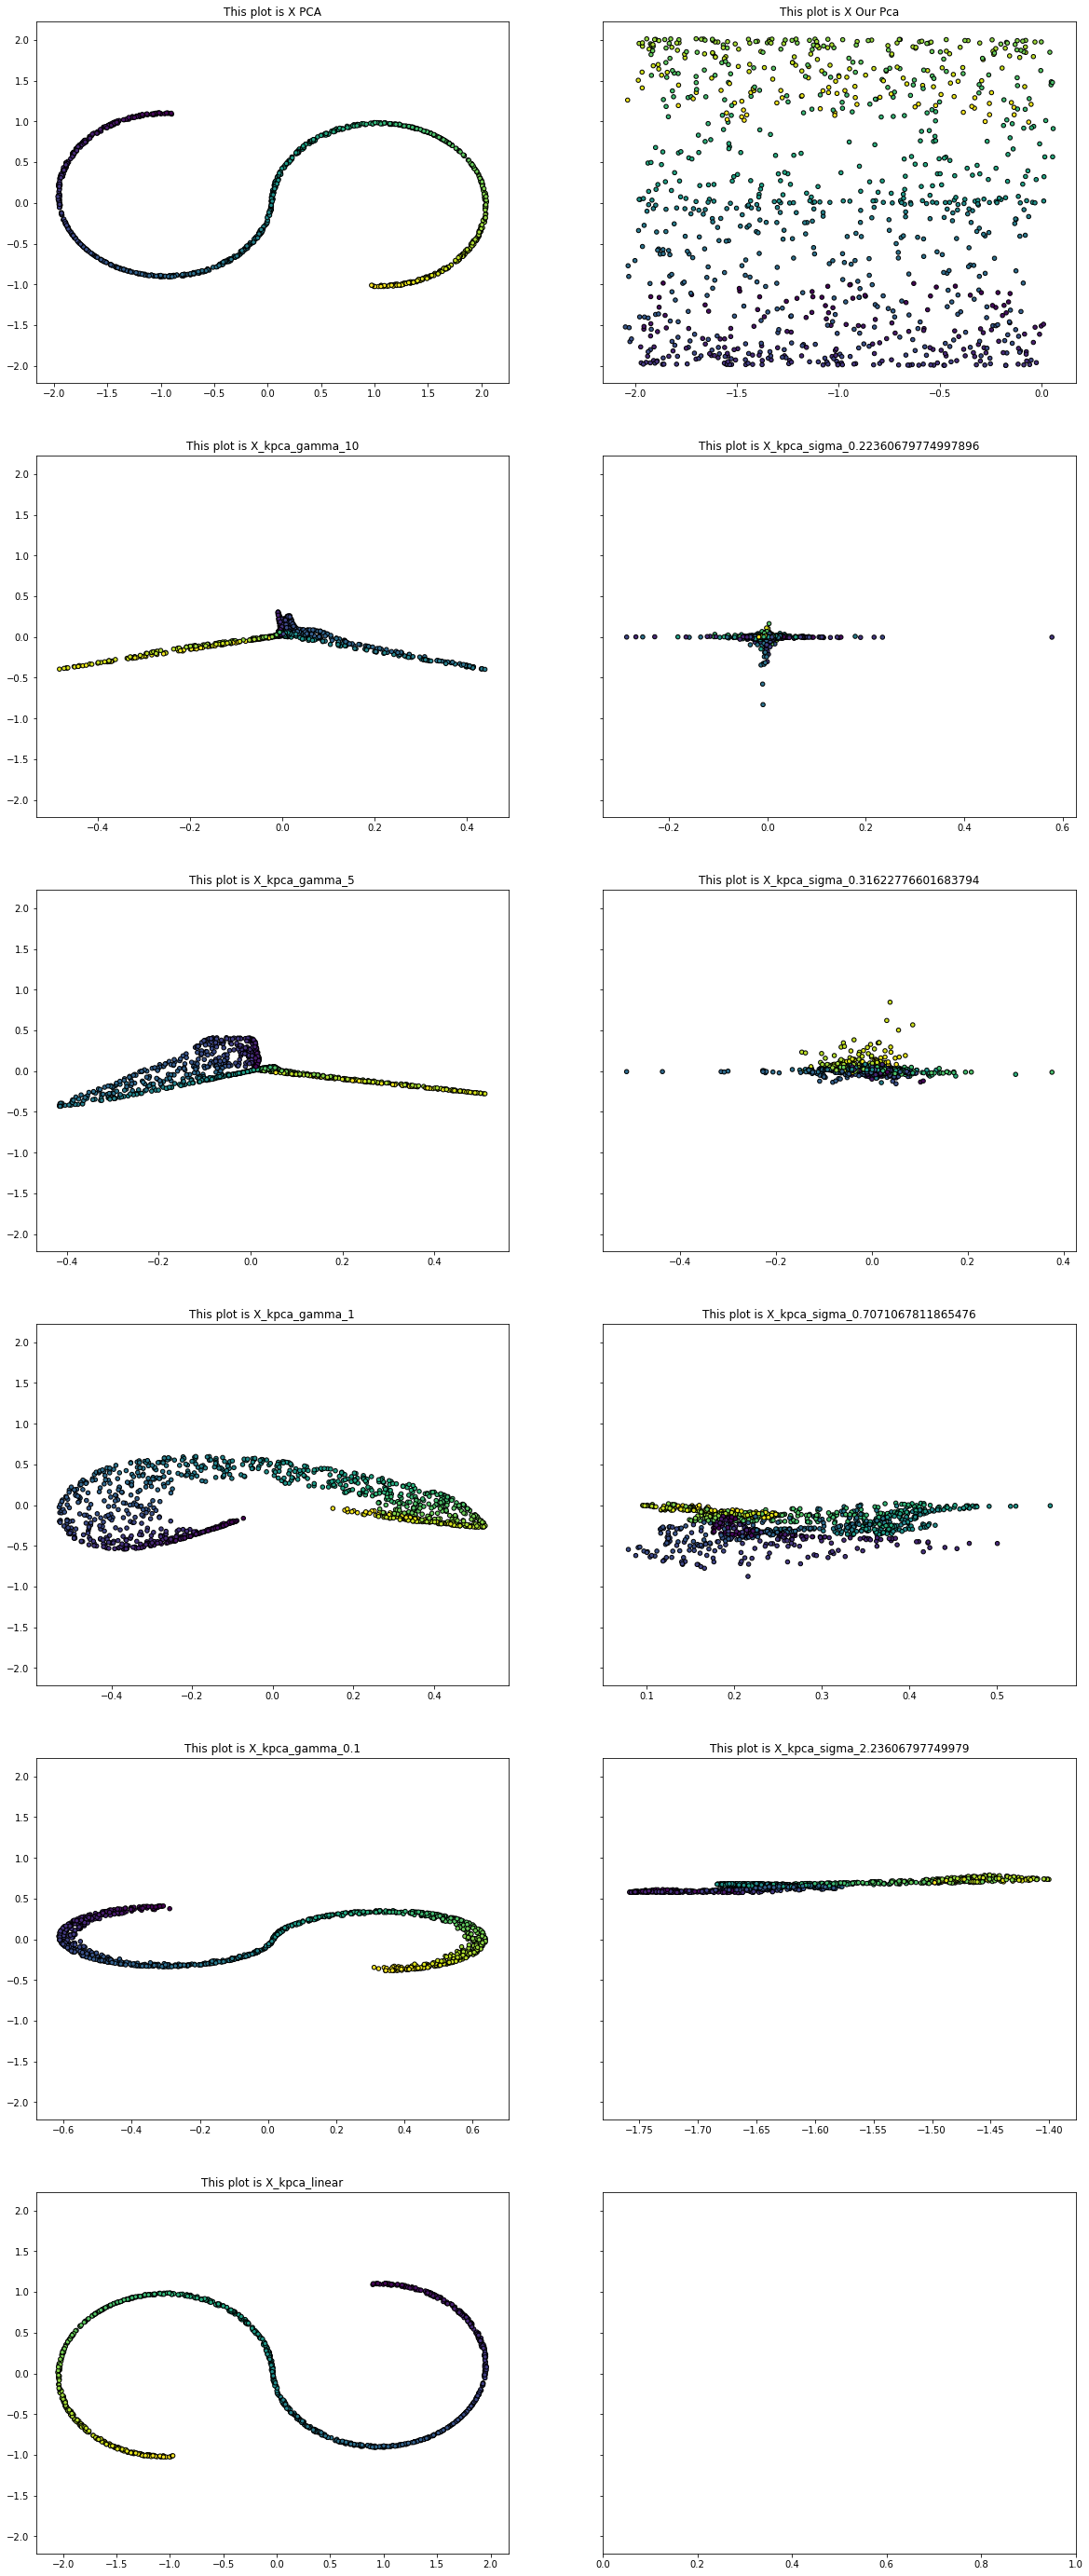

In [94]:

fig, ax = plt.subplots(6, 2, sharey=True, figsize=[20,50])
ax=np.reshape(ax,-1)

for index, plot in enumerate(plots.keys()):
    ax[index].scatter(plots[plot][:, 0], plots[plot][:, 1],c=color,
#                       title=f"This plot is {plot}",
                    
                s=20, edgecolor='k')
    ax[index].set_title(f"This plot is {plot}")



plt.show()

## conclusions :
- After running normal Pca we fount out that we lost most information on the process.
- We run **KPCA** with different $\gamma$ values to find the obtimal value. for $\gamma~= ~ 1$ we soud that the projection represent the original fold better than different values of $\gamma$ when $\gamma ~ = ~1/{2\sigma^2}$ 


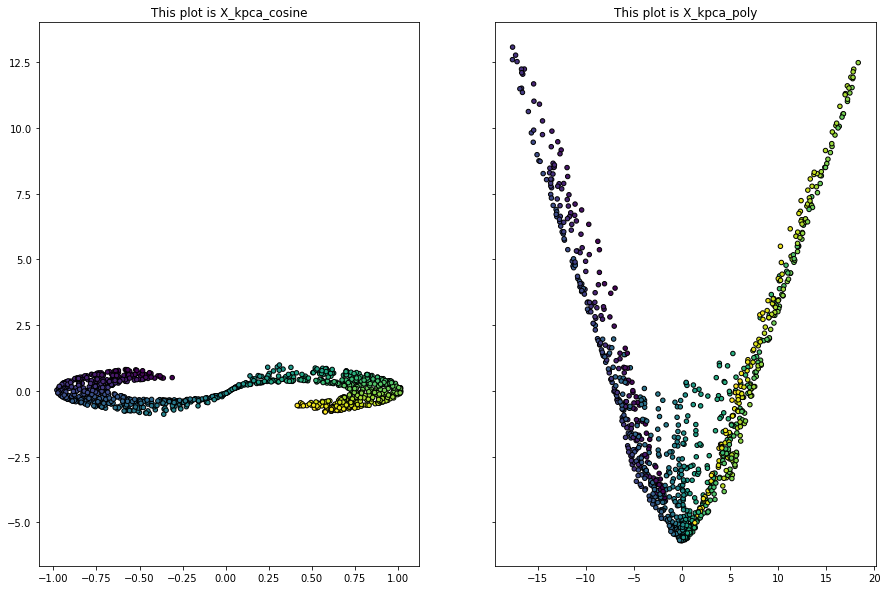

In [7]:
plots_1={}
plots_1['X_kpca_cosine'] = KernelPCA(kernel="cosine").fit_transform(X)
plots_1[f'X_kpca_poly'] = KernelPCA(kernel="poly", fit_inverse_transform=True, gamma=1).fit_transform(X)


fig, ax = plt.subplots(1, 2, sharey=True, figsize=[15,10])
ax=np.reshape(ax,-1)

for index, plot in enumerate(plots_1.keys()):
    ax[index].scatter(plots_1[plot][:, 0], plots_1[plot][:, 1],c=color,  s=20, edgecolor='k')
    ax[index].set_title(f"This plot is {plot}")



plt.show()

## conclusion 
-The Poly and cosine K-PCA are not as good as Gausian with $\sigma = 1$

Text(0.5,0.92,'Original data')

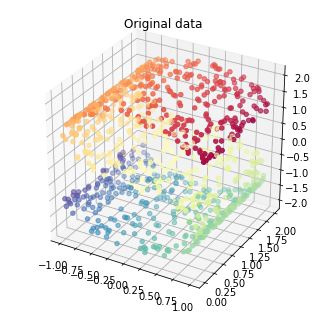

In [263]:
fig = plt.figure(figsize = (12,12))

ax = fig.add_subplot(221, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.set_title("Original data")